In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import cv2
import os
import shutil
import globalVal
from plots import draw_fixations
from plots import draw_heatmap
from plots import image_convert
from plots import draw_arrows
from plots import draw_boundingbox
from util import fixation_detection   # util file to find fixation and saccade detection.
from util import fix_count
from util import video_generator
from util import fixations_integration
from util import step_count
from util import turnback_count

import matplotlib.pyplot as plt
import matplotlib.image as img

dataset = globalVal.dataset_path + 'dataset1.csv'
image = globalVal.images_path + 'im1' + '.jpeg'

In [2]:
def load_data():
    data = pd.read_csv(dataset)
    data.fillna(0, inplace=True)    # Using '0' to replace 'N\A'
    return data
data = load_data()
# Only left gaze data is used
x = np.array(data['x_cod_left_gaze'])     # x-coordinate
y = np.array(data['y_cod_left_gaze'])     # y-coordinate
time = np.array(data['time_stamp'])       # time stamp

In [3]:
Sfix, Efix = fixation_detection(x, y, time, missing=0.0, maxdist=15, mindur=50)
fixations = Efix
fixation = draw_fixations(fixations, dispsize = [1920, 1080], imagefile=image,
                          alpha=0.4)

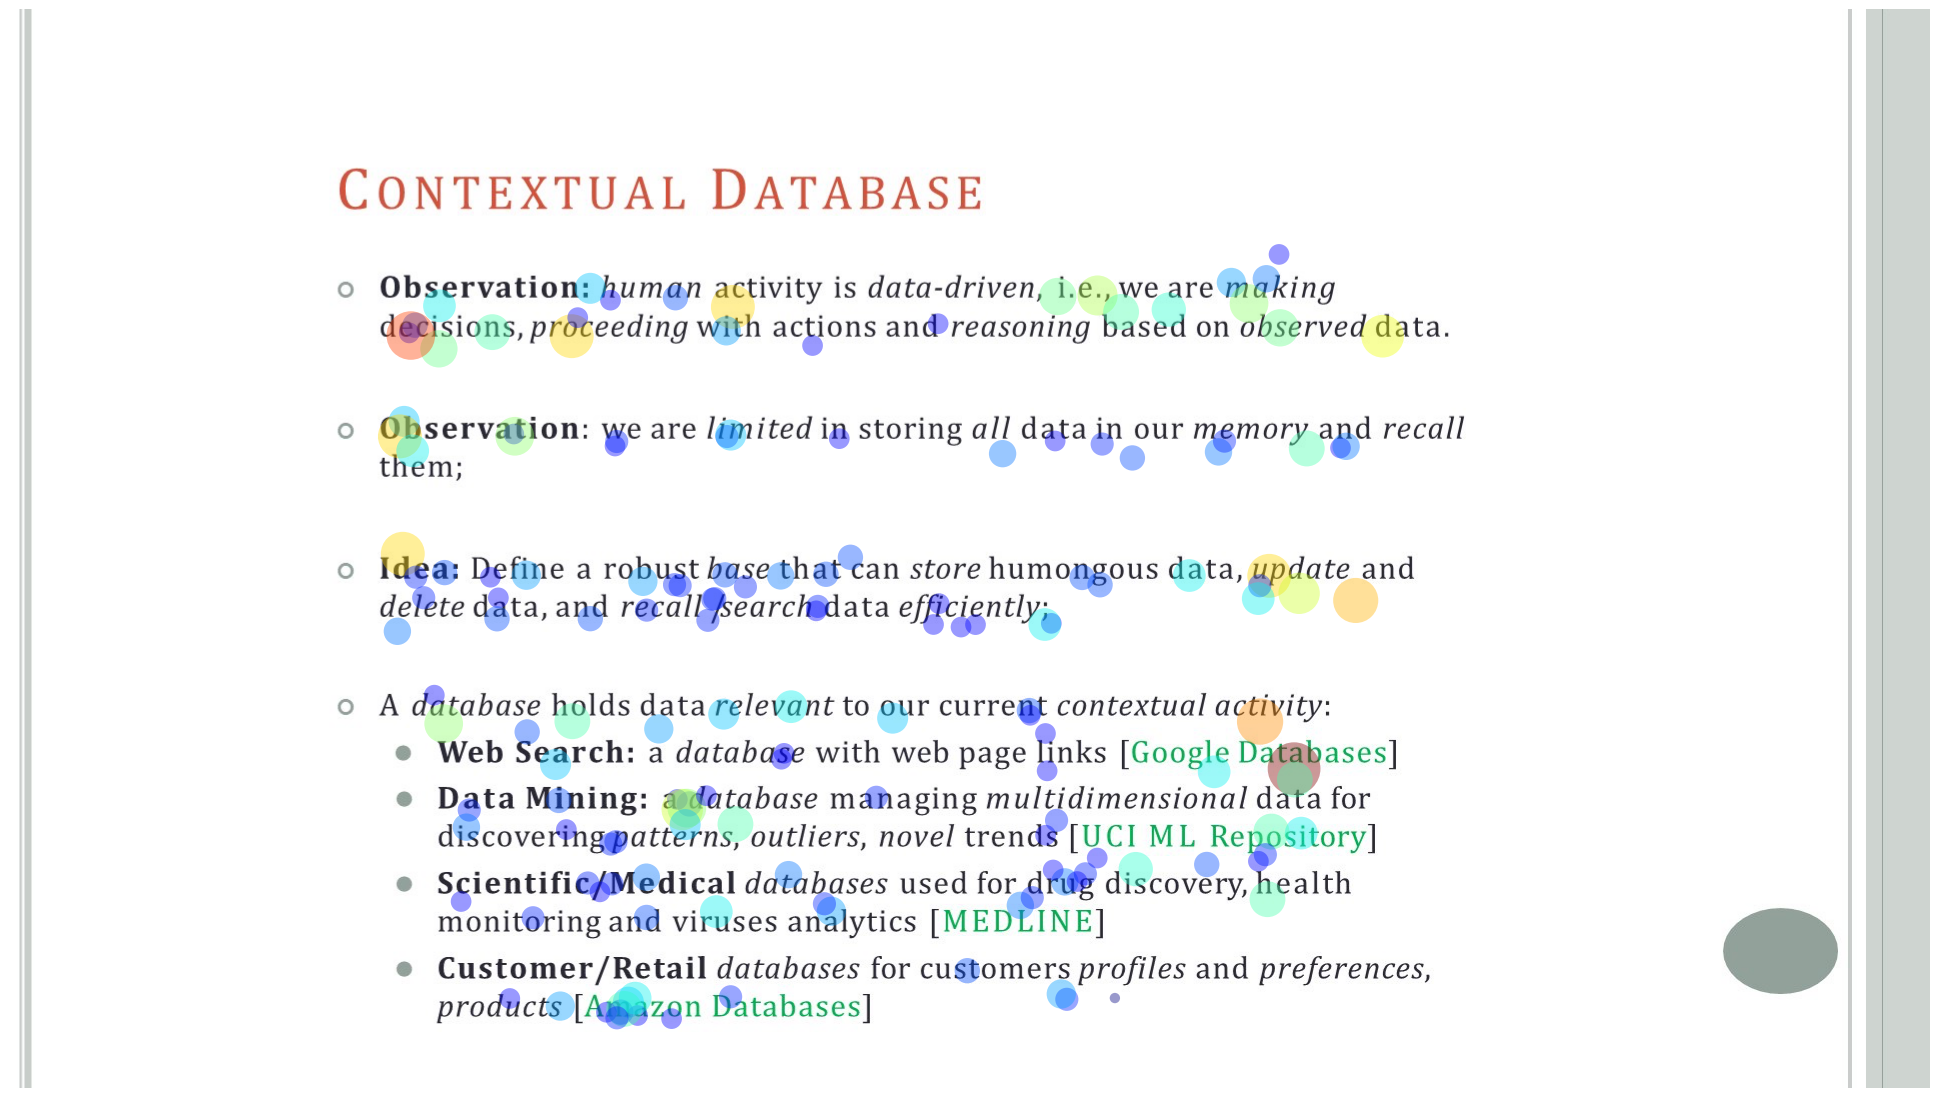

In [4]:
fixation

In [5]:
type(fixation)

matplotlib.figure.Figure